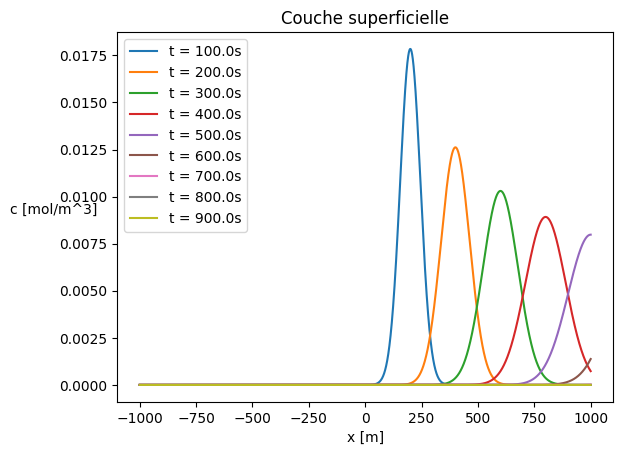

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Q=1
D=10
tf=1000
v=2


def c(x):
    return Q/(np.sqrt(np.pi*D*t))*np.exp(-(x-v*t)**2/(4*D*t))

x=np.linspace(-1000,1000,10000)

t=0.1*tf
while t<tf :
    plt.plot(x,c(x), label=f't = {t:.1f}s')
    t+=0.1*tf

plt.xlabel('x [m]')
plt.ylabel('c [mol/m^3]', rotation=0)
plt.title('Couche superficielle')
plt.legend()
plt.show()

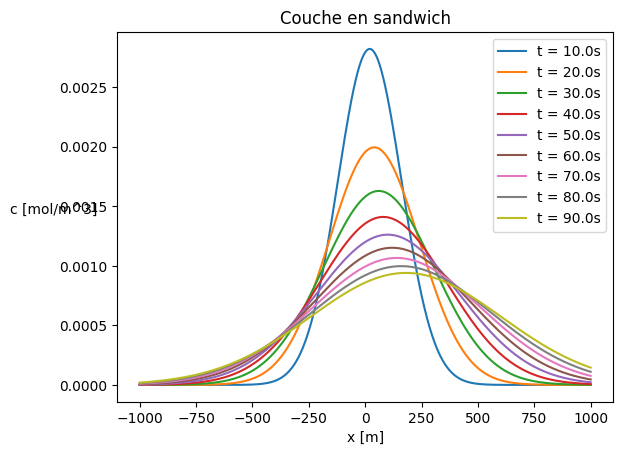

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Q=1
D=1000
tf=100
v=2


def c(x):
    return Q/(2*np.sqrt(np.pi*D*t))*np.exp(-(x-v*t)**2/(4*D*t))

x=np.linspace(-1000,1000,10000)

t=0.1*tf
while t<tf :
    plt.plot(x,c(x), label=f't = {t:.1f}s')
    t+=0.1*tf

plt.xlabel('x [m]')
plt.ylabel('c [mol/m^3]', rotation=0)
plt.title('Couche en sandwich')
plt.legend()
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss


D=10
tf=1
c0=1000
cs=200



def T(x):
    return ss.erf(x/(2*np.sqrt(D*t)))*(c0-cs)+cs

x=np.linspace(0,10,10000)

t=0.1*tf
while t<tf :
    plt.plot(x,T(x), label=f't = {t:.1f}s')
    t+=0.1*tf

plt.xlabel('x [m]')
plt.ylabel('c [mol/m^3]', rotation=0)
plt.title('Concentration superficielle constante dans une paroi semi-infinie')
plt.legend()
plt.show()

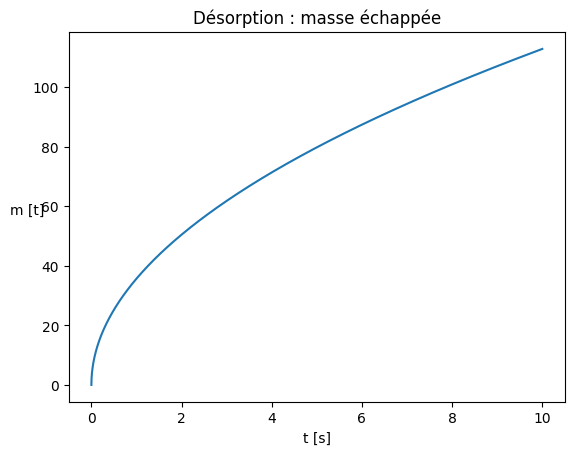

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss


D=10
tf=1
c0=10

plt.plot()

def c(x):
    return ss.erf(x/(2*np.sqrt(D*t)))*c0

x=np.linspace(0,10,10000)

t=0.1*tf
while t<tf :
    plt.plot(x,c(x), label=f't = {t:.1f}s')
    t+=0.1*tf

plt.xlabel('x [m]')
plt.ylabel('c [mol/m^3]', rotation=0)
plt.title('Désorption : concentration')
plt.legend()
plt.show()

plt.plot()


def m(t):
    return 2*c0*np.sqrt(D*t/np.pi)

t=np.linspace(0,10,10000)

plt.plot(t,m(t))
   

plt.xlabel('t [s]')
plt.ylabel('m [t]', rotation=0)
plt.title('Désorption : masse échappée')

plt.show()

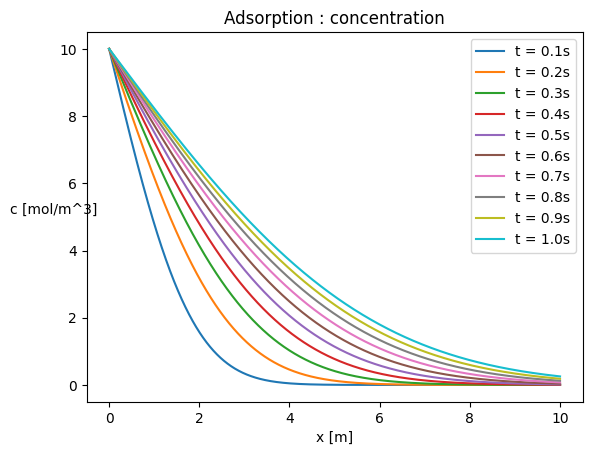

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss


D=10
tf=1
cs=10

plt.plot()

def c(x):
    return ss.erfc(x/(2*np.sqrt(D*t)))*cs

x=np.linspace(0,10,10000)

t=0.1*tf
while t<tf :
    plt.plot(x,c(x), label=f't = {t:.1f}s')
    t+=0.1*tf

plt.xlabel('x [m]')
plt.ylabel('c [mol/m^3]', rotation=0)
plt.title('Adsorption : concentration')
plt.legend()
plt.show()

plt.plot()


def m(t):
    return 2*cs*np.sqrt(D*t/np.pi)

t=np.linspace(0,10,10000)

plt.plot(t,m(t))
   

plt.xlabel('t [s]')
plt.ylabel('m [t]', rotation=0)
plt.title('Désorption : masse absorbée')

plt.show()

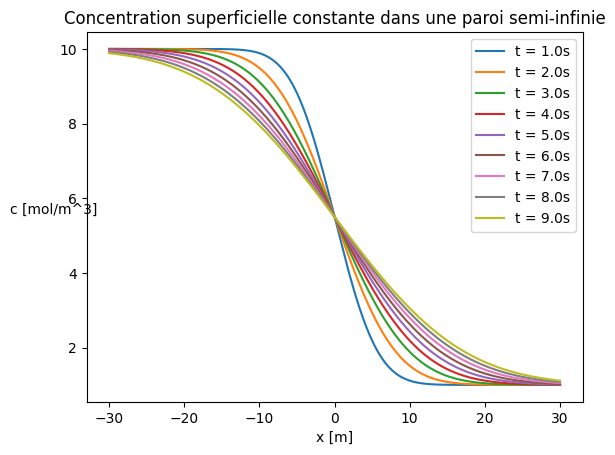

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss


D=10
tf=10
c2=10
c1=1



def T(x):
    return 1/2*ss.erfc(x/(2*np.sqrt(D*t)))*(c2-c1)+c1

x=np.linspace(-30,30,10000)

t=0.1*tf
while t<tf :
    plt.plot(x,T(x), label=f't = {t:.1f}s')
    t+=0.1*tf

plt.xlabel('x [m]')
plt.ylabel('c [mol/m^3]', rotation=0)
plt.title('Concentration superficielle constante dans une paroi semi-infinie')
plt.legend()
plt.show()

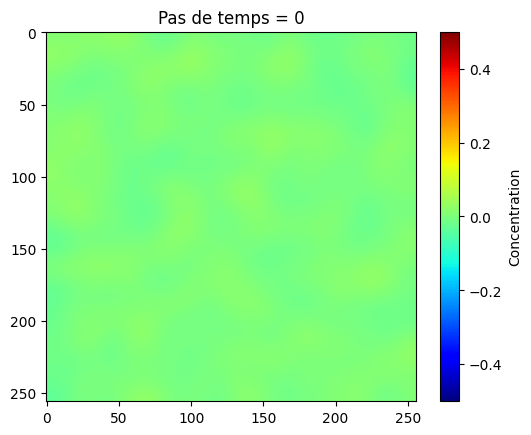

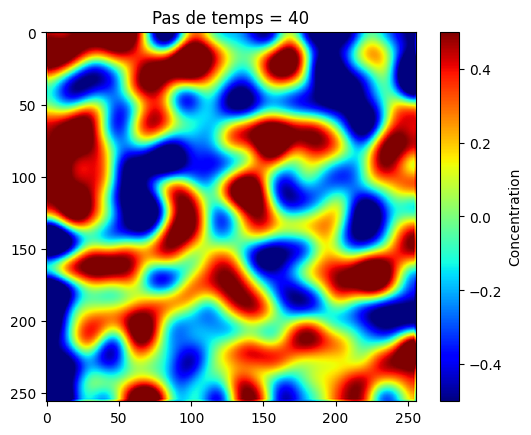

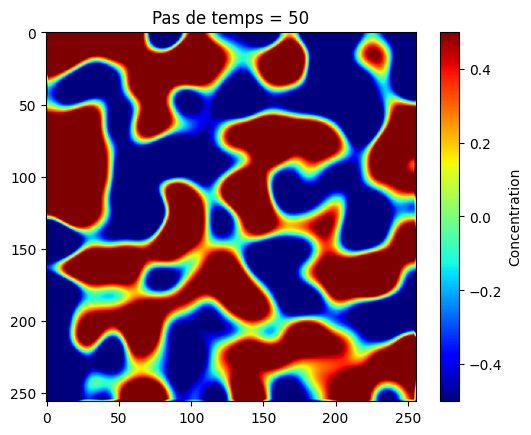

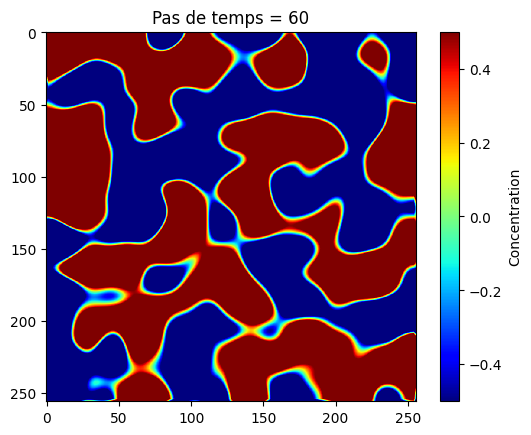

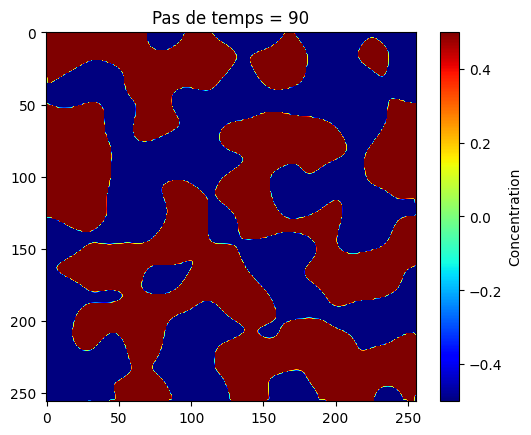

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Définir les paramètres de simulation
L = 100 # longueur de la grille
N = 256 # nombre de points de grille
dx = L/N # espacement de grille
dt = 0.1 # pas de temps
timesteps = 100 # nombre de pas de temps


phi = np.random.random((N,N))-0.5 
phi = gaussian_filter(phi, sigma=10) 


kappa = 0.1
alpha = 1
beta = 1


k = np.fft.fftfreq(N, d=dx)
kx, ky = np.meshgrid(k,k)
lap_operator = -(kx**2 + ky**2)


for i in range(timesteps):

    
    phi_sq = phi**2
    lap_phi = np.fft.ifft2(lap_operator*np.fft.fft2(phi))
    rhs = kappa*lap_phi + alpha*phi - beta*phi_sq*phi

  
    phi = phi + dt*(kappa*np.fft.ifft2(lap_operator*np.fft.fft2(rhs)) + alpha*rhs - beta*rhs**2*phi_sq)

   
    if i % 10 == 0:
        plt.imshow(np.real(phi), cmap='jet', vmin=-0.5, vmax=0.5)
        plt.colorbar(label='Concentration')
        plt.title('Pas de temps = {}'.format(i))
        plt.show()
